In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools
from mpl_toolkits import basemap
import mpl_toolkits.axes_grid1
import random
import datetime
import time

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

# Set up lat/lon of locations of interest

In [2]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

# Import coastal grid point indices

In [3]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

# Specify return period information and percentiles

In [4]:
#return_period = 200 # in years
#events_per_year = 151/40

return_period = 200
events_per_year = 151/40

return_val_perc = 100*(1-1/(return_period*events_per_year))
print(return_val_perc)

99.86754966887416


In [5]:
window=30
half_window=int(window/2)

# Set up directories where data are stored

In [6]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [7]:
working_dir = '/Users/baird/google_drive/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

# Import lat/lon information

In [8]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=30

days_per_season = 30+31+31+28+31

# Open PIC data

In [9]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
#half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

# Save all events as a numpy array, and save return period values

# Alternate approach: 

In [18]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'
# for each grid point:
# cycle through all times, get extreme seasonal sum in each time period, store in array with length(season_strings_pic)
# once this is done, calculate the return periods of each of these
return_period_values_pic = numpy.zeros(( PRECT_nlat*PRECT_nlon, 2))
all_events_pic = numpy.zeros((len(latlon_indices), n_seasons_pic))

for latlon_idx in range(len(latlon_indices)):
    if latlon_idx%10==0:
        print(latlon_idx)
    filename = 'member_005_latidx_'+'{:02d}'.format(latlon_indices[latlon_idx][0])+'_lonidx_'+'{:02d}'.format(latlon_indices[latlon_idx][1])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday_'+region+'.npy'
    dict_pic = numpy.load(working_dir + filename).item()
    #print(dict_pic['402-403'].keys())
    seasonal_events_max_list = [numpy.nanmax(dict_pic[i]['running_40d_sum']) for i in dict_pic.keys()]
    all_events_pic[latlon_idx,:] = seasonal_events_max_list
    #return_period_values_pic[latlon_idx,0] = numpy.percentile(seasonal_events_list, return_val_perc)#, interpolation='nearest')
    #return_period_values_pic[latlon_idx,1] = numpy.sum(seasonal_events_list>return_period_values_pic[latlon_idx,0])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640


In [19]:
numpy.save('csv_files/all_events_pic_max.npy', all_events_pic)

In [20]:
all_events_pic_max = numpy.load('csv_files/all_events_pic_max.npy')

# Open all PIC events (which have already been saved as a npy array)

In [22]:
all_events_pic = numpy.load('csv_files/all_events_pic.npy')

# Open return period calculations

In [23]:
return_period_values_pic_df = pandas.read_csv('csv_files/return_period_values_pic_df_update.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]

# Open historical, RCP and place all data into a 3d array

In [24]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

In [25]:
year_start = 1920
year_end = 2100

year_start_list = numpy.arange(1920,2070)
year_end_list = numpy.arange(1950,2100)
year_middle_list = year_start_list+15

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)
season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(year_start,year_end)]

thirty_yr_strings_hist_rcp = [str(year_start_list[i])+'-'+str(year_end_list[i]) for i in range(year_start_list.size)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist_rcp=year_end-year_start

## Open all data already saved in npy array

In [14]:
all_events_hist_rcp_3d = numpy.load('csv_files/all_events_hist_rcp_3d.npy')
print(all_events_hist_rcp_3d.shape)

(650, 40, 27180)


# Open all data and retain only maximum 40d values every season

In [ ]:
# loop through every grid point and attach ALL ensemble members information
all_events_total = []
total_events_each_latlon = []
all_events_hist_rcp = numpy.zeros(( 650, 40, n_seasons_hist_rcp ))

for latlon_idx in range(len(latlon_indices)):
    if latlon_idx%10==0:
        print(latlon_idx)
    total_events_each_latlon = []
    for ensemble_idx in range(len(ensemble_members)):
        filename = 'member_'+ensemble_names[ensemble_idx]+'_latidx_'+'{:02d}'.format(latlon_indices[latlon_idx][0])+'_lonidx_'+'{:02d}'.format(latlon_indices[latlon_idx][1])+'_years_1920-2100_threshold_'+str(threshold)+'mmday_'+region+'.npy'
        dict_hist_rcp = numpy.load(working_dir+filename).item()
        total_events_each_latlon.append( [numpy.nanmax(dict_hist_rcp[i]['running_40d_sum']) for i in season_strings_hist_rcp] )
        all_events_hist_rcp[latlon_idx,ensemble_idx,:] = total_events_each_latlon[-1]
    #all_events_total.append(total_events_each_latlon)

In [31]:
all_events_hist_rcp_max = numpy.load('csv_files/all_events_hist_rcp_max_40d.npy')

In [32]:
print(all_events_hist_rcp_max.shape)

(650, 40, 180)


## Calculate all return periods for all time (in chunks of 30 years)

In [45]:
return_period_values_hist_rcp = numpy.load('csv_files/return_period_values_hist_rcp.npy')
#print(return_period_values_hist_rcp.shape) #650x150x3

# Using R library to calculate AD k-sample test

In [33]:
import rpy2
import rpy2.robjects.packages

#rpy2.robjects.packages.importr
utils = rpy2.robjects.packages.importr('utils')
utils.chooseCRANmirror(ind=1)

#rpy2.robjects.packages.isinstalled('kSamples')
#utils.install_packages('kSamples')
kSamples = rpy2.robjects.packages.importr('kSamples')
ad_test = rpy2.robjects.r['ad.test']

In [34]:
print(n_seasons_hist_rcp)

180


In [35]:
print(all_events_hist_rcp_max.shape)
print(all_events_pic_max.shape)

(650, 40, 180)
(650, 1798)


In [40]:
sig_test_values = numpy.load('csv_files/sig_test_values_max_40d.npy')

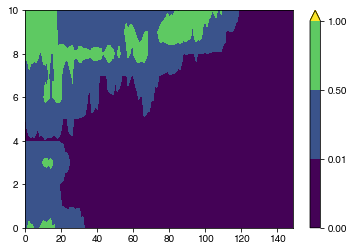

In [43]:
cf=mp.contourf(sig_test_values, levels=[0,0.01,0.5,1], extend='max')
#cf=mp.contourf(sig_test_values)#, extend='max')
mp.colorbar(cf)

# Calculate counts etc.

In [46]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

#return_values_pic_2d = return_period_values_pic[:,0].reshape(PRECT_nlat, PRECT_nlon)
#return_values_hist_rcp_2d = return_period_values_hist_rcp[:,0].reshape(PRECT_nlat, PRECT_nlon)

print(pic_counts.shape, hist_rcp_counts.shape)
count_ratio = ((hist_rcp_counts/(30*40)).T/(pic_counts/1798)).T
count_ratio_2d = count_ratio.reshape((PRECT_nlat, PRECT_nlon, 150))
count_ratio_2d_cali = numpy.mean( count_ratio_2d[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:].reshape((11,3,150)) , axis=1)

(650,) (650, 150)


In [47]:
return_period_values_hist_rcp_4d = return_period_values_hist_rcp.reshape((PRECT_nlat,PRECT_nlon,150,3))
return_period_values_hist_rcp_cali_coast = return_period_values_hist_rcp_4d[cali_coast_latlon_indices[:,0], \
                                                                           cali_coast_latlon_indices[:,1], \
                                                                           :,:]

In [48]:
return_period_values_hist_rcp_cali_coast = numpy.mean(return_period_values_hist_rcp_cali_coast.reshape((11,3,150,3)), axis=1)

In [49]:
print(half_years_hist_rcp[15:(half_years_hist_rcp.shape[0]-15)].shape)
half_years_hist_rcp_30 = half_years_hist_rcp[15:(half_years_hist_rcp.shape[0]-15)]


(150,)


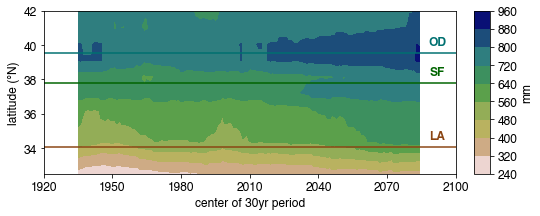

In [50]:
fontsize=12

fig = mp.figure(figsize=(8,3))

ax = fig.add_subplot(111)

ax_cf = ax.contourf(year_middle_list, PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], return_period_values_hist_rcp_cali_coast[:,:,0], cmap='gist_earth_r')
#ax.set_xticks()

la_color = 'saddlebrown'
sf_color = 'darkgreen'
od_color = '#007070' # '#008080' is teal

#ax.axhline(LA_lat, c='firebrick', zorder=1)
ax.axhline(LA_lat, c=la_color, zorder=1)
ax.axhline(SF_lat, c=sf_color, zorder=1)
ax.axhline(Oroville_dam_lat, c=od_color, zorder=1)

ax.text(s='LA', x=2092, y=LA_lat+0.3, color=la_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')
ax.text(s='SF', x=2092, y=SF_lat+0.3, color=sf_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')
ax.text(s='OD', x=2092, y=Oroville_dam_lat+0.3, color=od_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')

ax.set_xlim(1920,2100)
ax.set_xticks(numpy.arange(1920,2101,30))
ax.set_yticks(numpy.arange(34,43,2))

ax.tick_params(labelsize=fontsize)

ax.set_ylabel('latitude ('+degree_sign+'N)', fontsize=fontsize)
ax.set_xlabel('center of 30yr period', fontsize=fontsize)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='4%', pad=0.25) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(ax_cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('mm', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

#cbar = mp.colorbar(ax_cf)
#cbar.set_label('mm', size=fontsize)
#cbar.ax.tick_params(labelsize=fontsize)

# Calculating changes in frequency of occurrence

In [51]:
# calculate ratio of frequencies of exceedance
pic_counts = return_period_values_pic[:,1]
hist_rcp_counts = return_period_values_hist_rcp[:,:,2]

#return_values_pic_2d = return_period_values_pic[:,0].reshape(PRECT_nlat, PRECT_nlon)
#return_values_hist_rcp_2d = return_period_values_hist_rcp[:,0].reshape(PRECT_nlat, PRECT_nlon)

print(pic_counts.shape, hist_rcp_counts.shape)
count_ratio = ((hist_rcp_counts/(30*40)).T/(pic_counts/1798)).T
count_ratio_2d = count_ratio.reshape((PRECT_nlat, PRECT_nlon, 150))
count_ratio_2d_cali = numpy.mean( count_ratio_2d[cali_coast_latlon_indices[:,0],cali_coast_latlon_indices[:,1],:].reshape((11,3,150)) , axis=1)

(650,) (650, 150)


In [52]:
class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y))

In [53]:
# make color map
minval=0.0 # 
maxval=0.85 #
n=256
full_cmap = mp.get_cmap('RdBu')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

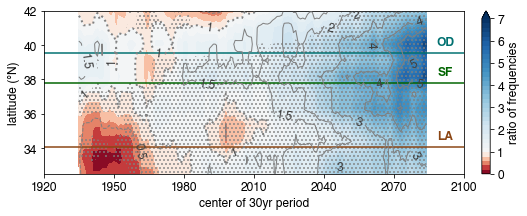

In [64]:
fontsize=12

fig = mp.figure(figsize=(8,3))

ax = fig.add_subplot(111)

contour_levels = numpy.arange(0,7.1,0.2)

ax_cf = ax.contourf(year_middle_list, \
                    PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], \
                    count_ratio_2d_cali, \
                    norm=MidpointNormalize(midpoint=1.0), \
                    cmap='RdBu', \
                    levels=contour_levels, \
                    extend='max')

ax_sig = ax.contourf(year_middle_list, \
                    PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], \
                    sig_test_values, \
                    #count_ratio_2d_cali_bool, \
                    colors='None', \
                    levels=[0.0,0.1,1.0], \
                    hatches=['...',None], \
                    extend='lower', \
                    edgecolors='red', \
                    zorder=2)

ax_c = ax.contour(year_middle_list, \
                    PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], \
                    count_ratio_2d_cali, \
                    norm=MidpointNormalize(midpoint=1.0), \
                    levels=[0,0.5,1,1.5,2,3,4,5], \
                    colors='0.5', \
                    linestyles=['--']*2+[':']+['-']*5, \
                    linewidths=[1]*2+[2]+[1]*5, \
                    zorder=3)

new_levels = []
for i in ax_c.levels:
    if i in [0.5,1.5]:
        new_levels.append('{:.1f}'.format(i))
    else:
        new_levels.append('{:.0f}'.format(i))
ax_c.levels = new_levels
mp.clabel(ax_c, fontsize=fontsize, colors='0.25')

la_color = 'saddlebrown'
sf_color = 'darkgreen'
od_color = '#007070' # '#008080' is teal

#ax.axhline(LA_lat, c='firebrick', zorder=1)
ax.axhline(LA_lat, c=la_color, zorder=2)
ax.axhline(SF_lat, c=sf_color, zorder=2)
ax.axhline(Oroville_dam_lat, c=od_color, zorder=2)

ax.text(s='LA', x=2092, y=LA_lat+0.3, color=la_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')
ax.text(s='SF', x=2092, y=SF_lat+0.3, color=sf_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')
ax.text(s='OD', x=2092, y=Oroville_dam_lat+0.3, color=od_color, ha='center', va='bottom', fontsize=fontsize, weight='bold')

ax.set_xlim(1920,2100)
ax.set_xticks(numpy.arange(1920,2101,30))
ax.set_yticks(numpy.arange(34,43,2))

ax.tick_params(labelsize=fontsize)

ax.set_ylabel('latitude ('+degree_sign+'N)', fontsize=fontsize)
ax.set_xlabel('center of 30yr period', fontsize=fontsize)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='2%', pad=0.25) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(ax_cf, cax=cbar_ax, orientation='vertical')
cbar.set_label('ratio of frequencies', fontsize=fontsize)#, labelpad=10)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([0,1,2,3,4,5,6,7])

#cf = mp.contourf(year_middle_list, PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])], count_ratio_2d_cali)
#mp.colorbar(cf)

fig.savefig('time_latitude_plot.pdf', transparent=True, bbox_inches='tight')

In [55]:
# make sure windows match up

In [56]:
#print(year_middle_list)
#PRECT_lat_subset = numpy.unique(cali_coast_latlon_indices[:,0])
#print(PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])])
#print(count_ratio_2d_cali)

In [57]:
PRECT_lat_subset = PRECT_lat[numpy.unique(cali_coast_latlon_indices[:,0])]

In [58]:
# convert times
time_datetime = [datetime.datetime(i,1,15) for i in year_middle_list]
time_nc = netCDF4.date2num(time_datetime, units='days since 1920-01-01', calendar='standard')

In [65]:
# save hist clim
filename = 'time_latitude_200year_40day_wet_events.nc'

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_lat_subset.size)
time_dim = ncfile.createDimension('time', len(year_middle_list))

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
time_var = ncfile.createVariable('time', 'f4', ('time',))
lat_var[:] = PRECT_lat_subset
time_var[:] = time_nc
lat_var.units = 'degrees_north'
time_var.units = 'days since 1920-01-01'
time_var.description = 'Each year is centered on the 30 years surrounding it'

ratios_of_frequencies = ncfile.createVariable('time_lat_ratios', 'f4', ('lat','time'))
ratios_of_frequencies[:] = count_ratio_2d_cali
ratios_of_frequencies.units = 'unitless'
ratios_of_frequencies.description = 'Ratio of frequencies for coastal California grid points (average of 3 for each latitude)'

ad_pvals = ncfile.createVariable('ad_pvals', 'f4', ('lat','time'))
ad_pvals[:] = sig_test_values
ad_pvals.description = 'P-values calculated from the Anderson-Darling k-samples test on all values ABOVE the PIC median (using the R function kSamples.ad.test() within Python).  Points where p-value<0.05 are significant at the 95% conf. level; points where p-value<0.01 are significant at the 99% conf. level, etc.'

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")

time_latitude_200year_40day_wet_events.nc saved
